In [1]:
import numpy as np
import pandas as pd
from keras.utils import to_categorical
from sklearn.model_selection import train_test_split
import tensorflow as tf

In [2]:
import numpy as np
import pandas as pd
from keras.utils import to_categorical
from sklearn.model_selection import train_test_split

# Load training and test data into dataframes
data_train = pd.read_csv('fashion-mnist_train.csv')
data_test = pd.read_csv('fashion-mnist_test.csv')

# X forms the training images, and y forms the training labels
X = np.array(data_train.iloc[:, 1:])
y = to_categorical(np.array(data_train.iloc[:, 0]))

# Here I split original training data to sub-training (80%) and validation data (20%)
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=13)

# X_test forms the test images, and y_test forms the test labels
X_test = np.array(data_test.iloc[:, 1:])
y_test = to_categorical(np.array(data_test.iloc[:, 0]))

In [3]:
# Each image's dimension is 28 x 28
img_rows, img_cols = 28, 28
input_shape = (img_rows, img_cols, 1)

# Prepare the training images
X_train = X_train.reshape(X_train.shape[0], img_rows, img_cols, 1)
X_train = X_train.astype('float32')
X_train /= 255

# Prepare the test images
X_test = X_test.reshape(X_test.shape[0], img_rows, img_cols, 1)
X_test = X_test.astype('float32')
X_test /= 255

# Prepare the validation images
X_val = X_val.reshape(X_val.shape[0], img_rows, img_cols, 1)
X_val = X_val.astype('float32')
X_val /= 255

In [4]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D, BatchNormalization

cnn4 = Sequential()
cnn4.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=input_shape))
cnn4.add(BatchNormalization())

cnn4.add(Conv2D(32, kernel_size=(3, 3), activation='relu'))
cnn4.add(BatchNormalization())
cnn4.add(MaxPooling2D(pool_size=(2, 2)))
cnn4.add(Dropout(0.25))

cnn4.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
cnn4.add(BatchNormalization())
cnn4.add(Dropout(0.25))

cnn4.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
cnn4.add(BatchNormalization())
cnn4.add(MaxPooling2D(pool_size=(2, 2)))
cnn4.add(Dropout(0.25))

cnn4.add(Flatten())

cnn4.add(Dense(512, activation='relu'))
cnn4.add(BatchNormalization())
cnn4.add(Dropout(0.5))

cnn4.add(Dense(128, activation='relu'))
cnn4.add(BatchNormalization())
cnn4.add(Dropout(0.5))

cnn4.add(Dense(10, activation='softmax'))

In [5]:
cnn4.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adam(),
              metrics=['accuracy'])

In [6]:
cnn4.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 batch_normalization (Batch  (None, 26, 26, 32)        128       
 Normalization)                                                  
                                                                 
 conv2d_1 (Conv2D)           (None, 24, 24, 32)        9248      
                                                                 
 batch_normalization_1 (Bat  (None, 24, 24, 32)        128       
 chNormalization)                                                
                                                                 
 max_pooling2d (MaxPooling2  (None, 12, 12, 32)        0         
 D)                                                              
                                                        

In [7]:
history4 = cnn4.fit(X_train, y_train,
          batch_size=256,
          epochs=10,
          verbose=1,
          validation_data=(X_val, y_val))

Epoch 1/10
188/188 [==============================] - 32s 157ms/step - loss: 0.7596 - accuracy: 0.7385 - val_loss: 2.9384 - val_accuracy: 0.1537
Epoch 2/10
188/188 [==============================] - 30s 161ms/step - loss: 0.4419 - accuracy: 0.8429 - val_loss: 1.2176 - val_accuracy: 0.6095
Epoch 3/10
188/188 [==============================] - 30s 160ms/step - loss: 0.3713 - accuracy: 0.8669 - val_loss: 0.4112 - val_accuracy: 0.8501
Epoch 4/10
188/188 [==============================] - 29s 157ms/step - loss: 0.3321 - accuracy: 0.8815 - val_loss: 0.3176 - val_accuracy: 0.8835
Epoch 5/10
188/188 [==============================] - 30s 160ms/step - loss: 0.3038 - accuracy: 0.8918 - val_loss: 0.2904 - val_accuracy: 0.8933
Epoch 6/10
188/188 [==============================] - 29s 156ms/step - loss: 0.2853 - accuracy: 0.8984 - val_loss: 0.2609 - val_accuracy: 0.9071
Epoch 7/10
188/188 [==============================] - 30s 159ms/step - loss: 0.2698 - accuracy: 0.9039 - val_loss: 0.2508 - val_ac

In [8]:
score4 = cnn4.evaluate(X_test, y_test, verbose=0)
print('Test loss:', score4[0])
print('Test accuracy:', score4[1])

Test loss: 0.22185073792934418
Test accuracy: 0.9215999841690063


In [9]:
from keras.preprocessing.image import ImageDataGenerator
gen = ImageDataGenerator(rotation_range=8, width_shift_range=0.08, shear_range=0.3,
                               height_shift_range=0.08, zoom_range=0.08)
batches = gen.flow(X_train, y_train, batch_size=256)
val_batches = gen.flow(X_val, y_val, batch_size=256)

In [12]:
history4 = cnn4.fit(batches, steps_per_epoch=48000//256, epochs=50,
                    validation_data=val_batches, validation_steps=12000//256)


Epoch 1/50
187/187 [==============================] - 31s 166ms/step - loss: 0.3252 - accuracy: 0.8825 - val_loss: 0.2884 - val_accuracy: 0.8916
Epoch 2/50
187/187 [==============================] - 32s 173ms/step - loss: 0.3183 - accuracy: 0.8853 - val_loss: 0.2729 - val_accuracy: 0.8973
Epoch 3/50
187/187 [==============================] - 32s 170ms/step - loss: 0.3080 - accuracy: 0.8889 - val_loss: 0.2924 - val_accuracy: 0.8923
Epoch 4/50
187/187 [==============================] - 31s 167ms/step - loss: 0.3051 - accuracy: 0.8893 - val_loss: 0.2746 - val_accuracy: 0.9000
Epoch 5/50
187/187 [==============================] - 31s 168ms/step - loss: 0.2991 - accuracy: 0.8928 - val_loss: 0.2778 - val_accuracy: 0.9006
Epoch 6/50
187/187 [==============================] - 31s 168ms/step - loss: 0.2916 - accuracy: 0.8948 - val_loss: 0.2585 - val_accuracy: 0.9046
Epoch 7/50
187/187 [==============================] - 32s 169ms/step - loss: 0.2878 - accuracy: 0.8965 - val_loss: 0.2538 - val_ac

In [13]:
score4 = cnn4.evaluate(X_test, y_test, verbose=0)
print('Test loss:', score4[0])
print('Test accuracy:', score4[1])

Test loss: 0.17228268086910248
Test accuracy: 0.9388999938964844


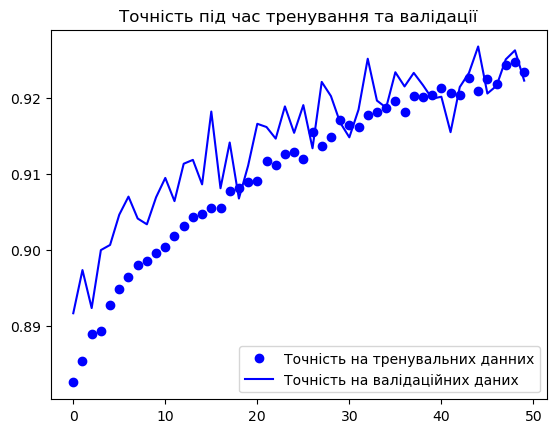

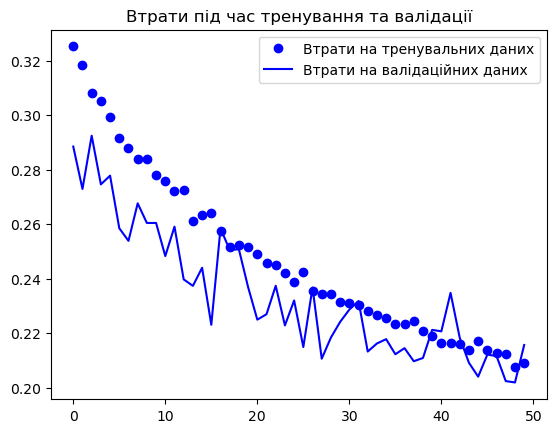

In [16]:
import matplotlib.pyplot as plt
%matplotlib inline

# Отримання значень точності під час тренування та валідації з історії навчання
accuracy = history4.history['accuracy']  # Точність на тренувальних даних
val_accuracy = history4.history['val_accuracy']  # Точність на валідаційних даних

# Отримання значень втрат під час тренування та валідації з історії навчання
loss = history4.history['loss']  # Втрати на тренувальних даних
val_loss = history4.history['val_loss']  # Втрати на валідаційних даних

epochs = range(len(accuracy))  # Кількість епох

# Візуалізація точності під час тренування та валідації
plt.plot(epochs, accuracy, 'bo', label='Точність на тренувальних данних')
plt.plot(epochs, val_accuracy, 'b', label='Точність на валідаційних даних')
plt.title('Точність під час тренування та валідації')
plt.legend()
plt.figure()

# Візуалізація втрат під час тренування та валідації
plt.plot(epochs, loss, 'bo', label='Втрати на тренувальних даних')
plt.plot(epochs, val_loss, 'b', label='Втрати на валідаційних даних')
plt.title('Втрати під час тренування та валідації')
plt.legend()
plt.show()


In [18]:
import numpy as np

# Отримання передбачених ймовірностей для кожного класу
predicted_probabilities = cnn4.predict(X_test)

# Конвертування передбачених ймовірностей в передбачені індекси класів
predicted_classes = np.argmax(predicted_probabilities, axis=1)

# Отримання індексів для подальшої візуалізації
y_true = y_test.argmax(axis=1)  # Конвертування one-hot закодованих y_test в індекси класів
correct = np.nonzero(predicted_classes == y_true)[0]  # Індекси правильно передбачених зразків
incorrect = np.nonzero(predicted_classes != y_true)[0]  # Індекси неправильно передбачених зразків


313/313 [==============================] - 2s 7ms/step


In [19]:
from sklearn.metrics import classification_report

target_names = ["Клас {}".format(i) for i in range(10)]

# Вивід звіту про класифікацію для оцінки результатів передбачень
print(classification_report(y_true, predicted_classes, target_names=target_names))


              precision    recall  f1-score   support

      Клас 0       0.89      0.88      0.88      1000
      Клас 1       1.00      1.00      1.00      1000
      Клас 2       0.93      0.90      0.91      1000
      Клас 3       0.93      0.96      0.95      1000
      Клас 4       0.90      0.91      0.91      1000
      Клас 5       0.99      0.99      0.99      1000
      Клас 6       0.81      0.81      0.81      1000
      Клас 7       0.97      0.97      0.97      1000
      Клас 8       0.98      1.00      0.99      1000
      Клас 9       0.97      0.97      0.97      1000

    accuracy                           0.94     10000
   macro avg       0.94      0.94      0.94     10000
weighted avg       0.94      0.94      0.94     10000



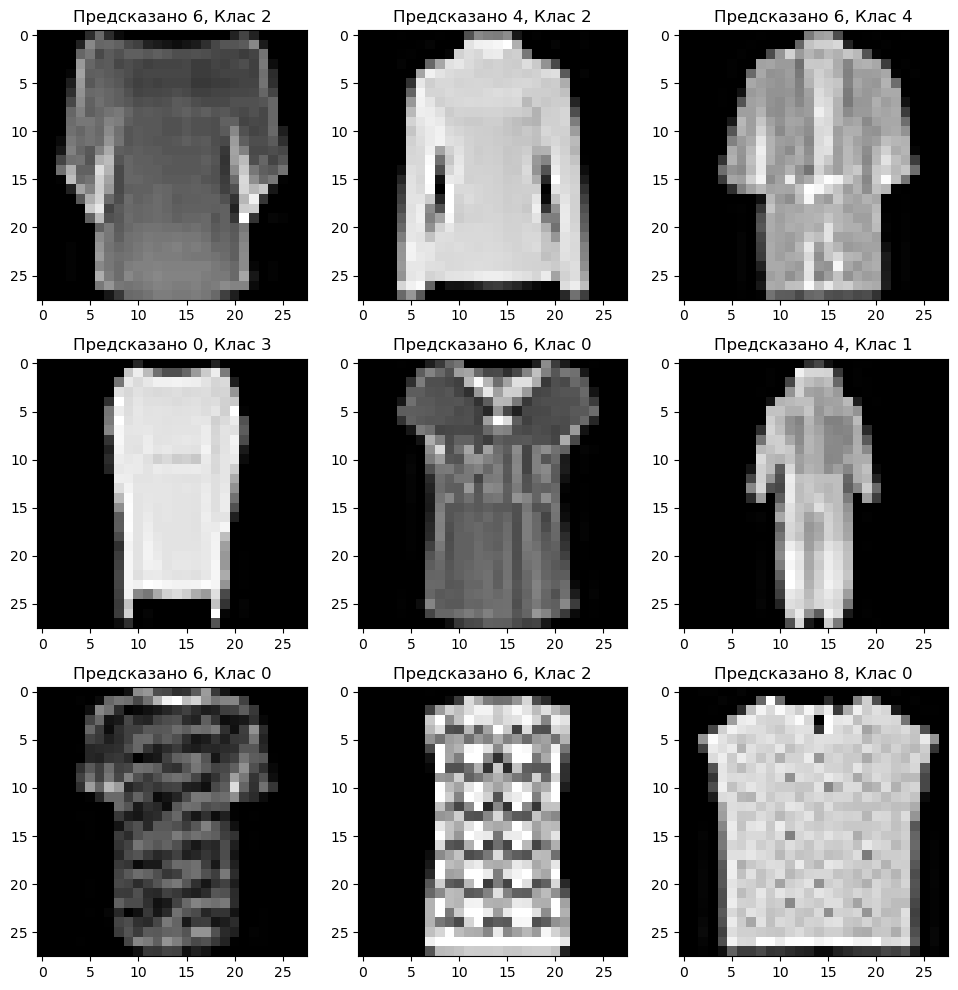

In [20]:
plt.figure(figsize=(10, 10))

# Відображення невірно передбачених зображень
for i, incorrect_idx in enumerate(incorrect[:9]):
    plt.subplot(3, 3, i + 1)
    plt.imshow(X_test[incorrect_idx].reshape(28, 28), cmap='gray', interpolation='none')
    plt.title("Предсказано {}, Клас {}".format(predicted_classes[incorrect_idx], y_true[incorrect_idx]))
    plt.tight_layout()

plt.show()


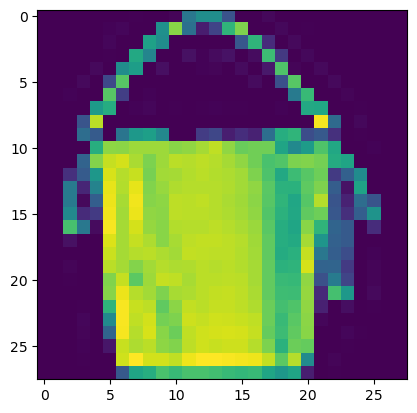

In [21]:
test_im1 = X_train[100]  # Вибір одного зображення з тренувального набору
plt.imshow(test_im1.reshape(28,28), cmap='viridis', interpolation='none')
plt.show()


1/1 [==============================] - 0s 71ms/step


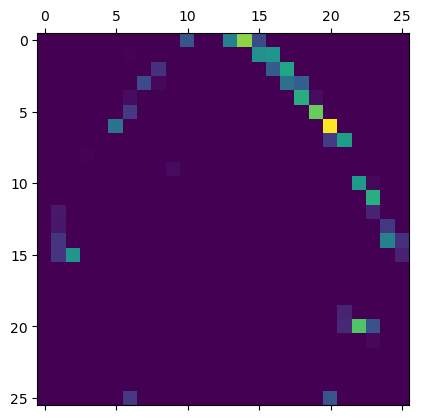

In [24]:
from keras import models

# Видобуває виходи з верхніх 8 шарів
layer_outputs = [layer.output for layer in cnn4.layers[:8]]

# Створює модель, яка поверне ці виходи при заданому вході
activation_model = models.Model(inputs=cnn4.input, outputs=layer_outputs)

# Повертає список Numpy масивів: один масив на кожний шар активації
activations = activation_model.predict(test_im1.reshape(1, 28, 28, 1))

# Активація першого шару конволюції
first_layer_activation = activations[0]

# Відображення 4-го каналу активації першого шару оригінальної моделі
plt.matshow(first_layer_activation[0, :, :, 4], cmap='viridis')


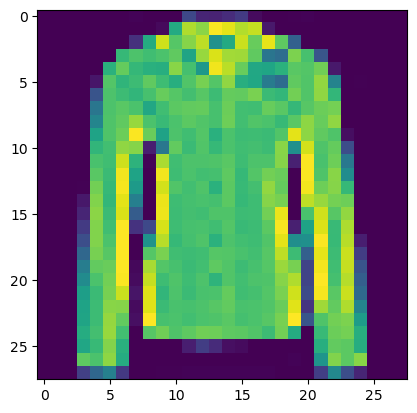

In [25]:
test_im2 = X_train[500]  # Обираємо зображення з індексом 500 з тренувального набору

# Відображаємо зображення, змінюючи його розмір на 28x28 пікселів та використовуючи колірну мапу "viridis". Інтерполяцію вимикаємо.
plt.imshow(test_im2.reshape(28, 28), cmap='viridis', interpolation='none')  
plt.show()  # Показуємо зображення


1/1 [==============================] - 0s 12ms/step


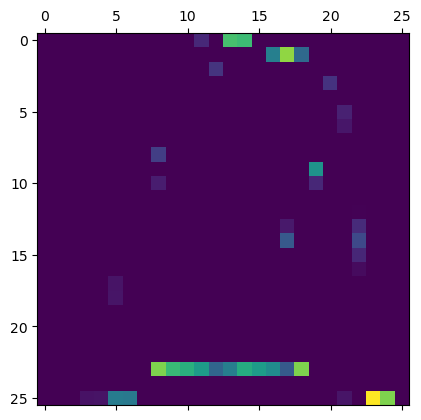

In [26]:
activations = activation_model.predict(test_im2.reshape(1, 28, 28, 1))  # Обчислюємо активації для зображення test_im2 за допомогою активаційної моделі
first_layer_activation = activations[0]  # Витягаємо активації першого шару
plt.matshow(first_layer_activation[0, :, :, 4], cmap='viridis')  # Відображаємо активації 4-го каналу першого шару з використанням колірної мапи "viridis"


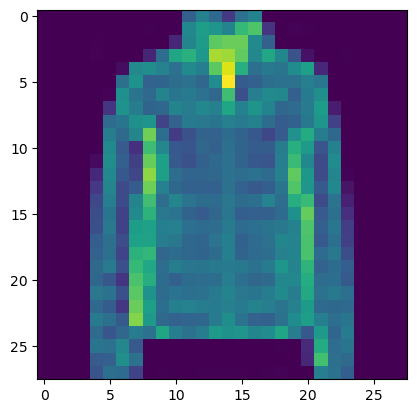

In [27]:
test_im3 = X_train[1000]  # Вибір зображення test_im3 з тренувального набору
plt.imshow(test_im3.reshape(28,28), cmap='viridis', interpolation='none')  # Відображення зображення test_im3 за допомогою колірної мапи "viridis"
plt.show()  # Показати зображення


1/1 [==============================] - 0s 12ms/step


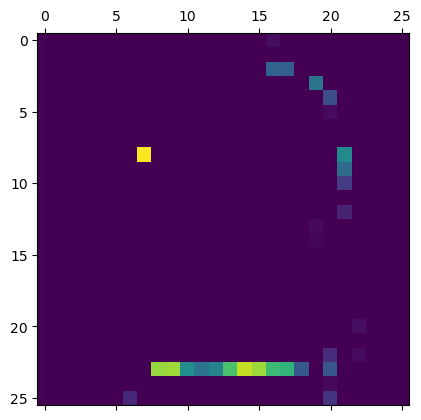

In [28]:
activations = activation_model.predict(test_im3.reshape(1,28,28,1))  # Отримання активацій для зображення test_im3
first_layer_activation = activations[0]  # Вибір активацій першого шару
plt.matshow(first_layer_activation[0, :, :, 4], cmap='viridis')  # Відображення матриці активацій четвертого каналу першого шару з використанням колірної мапи "viridis"


C:\Users\Tenrai\AppData\Local\Temp\ipykernel_5328\28738047.py:16: RuntimeWarning: invalid value encountered in divide
  channel_image /= channel_image.std()  # Нормалізація даних
C:\Users\Tenrai\AppData\Local\Temp\ipykernel_5328\28738047.py:19: RuntimeWarning: invalid value encountered in cast
  channel_image = np.clip(channel_image, 0, 255).astype('uint8')  # Обмеження значень


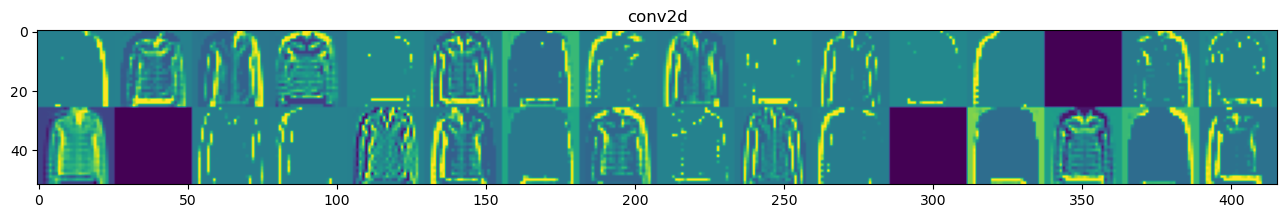

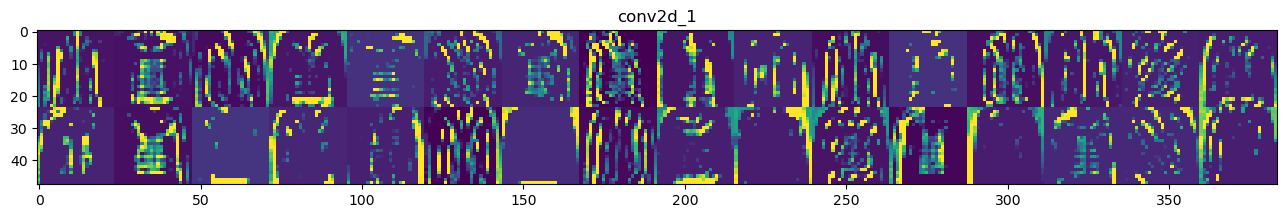

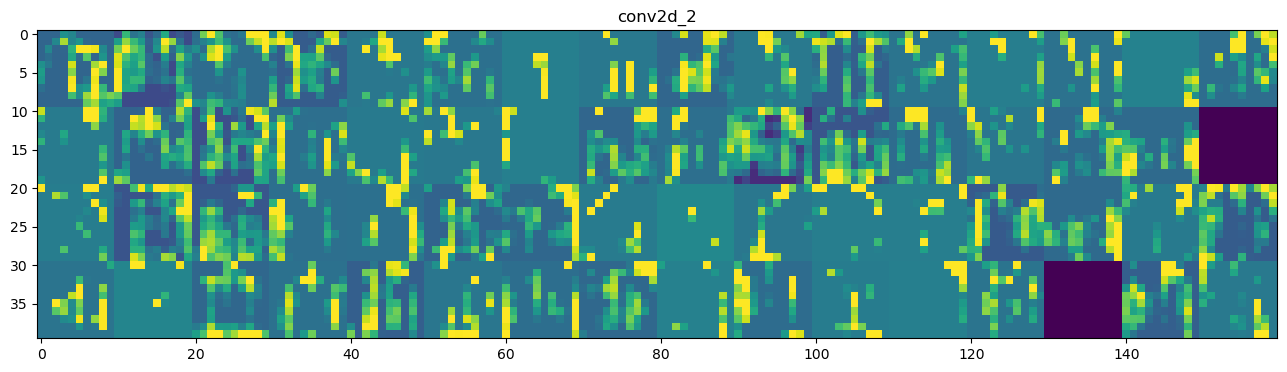

In [30]:
layer_names = []
for layer in cnn4.layers[:-1]:
    layer_names.append(layer.name) 

images_per_row = 16  # Кількість зображень на ряд
for layer_name, layer_activation in zip(layer_names, activations):
    if layer_name.startswith('conv'):  # Якщо шар починається з 'conv'
        n_features = layer_activation.shape[-1]  # Кількість каналів активації
        size = layer_activation.shape[1]  # Розмір активації
        n_cols = n_features // images_per_row  # Кількість рядків
        display_grid = np.zeros((size * n_cols, images_per_row * size))  # Підготовка матриці для відображення
        for col in range(n_cols):
            for row in range(images_per_row):
                channel_image = layer_activation[0,:, :, col * images_per_row + row]  # Вибір одного каналу активації
                channel_image -= channel_image.mean()  # Центрування даних
                channel_image /= channel_image.std()  # Нормалізація даних
                channel_image *= 64  # Збільшення контрастності
                channel_image += 128  # Зсув
                channel_image = np.clip(channel_image, 0, 255).astype('uint8')  # Обмеження значень
                display_grid[col * size : (col + 1) * size,
                             row * size : (row + 1) * size] = channel_image  # Заповнення матриці відображення
        scale = 1. / size
        plt.figure(figsize=(scale * display_grid.shape[1],
                            scale * display_grid.shape[0]))
        plt.title(layer_name)  # Заголовок - назва шару
        plt.grid(False)
        plt.imshow(display_grid, aspect='auto', cmap='viridis')  # Відображення активацій з використанням колірної мапи "viridis"
